In [345]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [346]:

df = pd.read_excel(r'D:/paper/qb/data/data_field_drona.xlsx')
df.head()

,N,River,ID,Date,W,S,Q,U,H,R,D16,D50,D84,D90,qs,Morphology
0,61,Big wood,1.0,19/05/1999,12.76,0.0091,9.60,1.367911,0.55,0.50,0.028,0.116,0.25,0.38,0.768,Plane Bed
1,62,Big wood,2.0,19/05/1999,12.76,0.0091,9.60,1.367911,0.55,0.50,0.028,0.116,0.25,0.38,4.220,Plane Bed
2,63,Big wood,3.0,20/05/1999,12.76,0.0091,10.76,1.453897,0.58,0.54,0.028,0.116,0.25,0.38,2.310,Plane Bed
3,64,Big wood,4.0,20/05/1999,12.76,0.0091,10.87,1.443866,0.59,0.54,0.028,0.116,0.25,0.38,5.970,Plane Bed
4,65,Big wood,5.0,21/05/1999,12.77,0.0091,12.97,1.562556,0.65,0.59,0.028,0.116,0.25,0.38,9.910,Plane Bed


In [347]:


lower_percentile = np.percentile(df['qs'], 15)
upper_percentile = np.percentile(df['qs'], 95)


print("lower_percentile : ",lower_percentile )
print("upper_percentile : ",upper_percentile )

lower_percentile :  0.12039999999999998
upper_percentile :  204.59999999999945


In [348]:
filtered_df = df[(df['qs'] >= lower_percentile) & (df['qs'] <= upper_percentile)]
np.shape(filtered_df)

(2989, 16)

In [349]:
duplicate_rows = filtered_df[filtered_df.duplicated(subset=['W','H','S','Q','D50','D84','D16','D90','R'], keep=False)]
duplicate_rows

,N,River,ID,Date,W,S,Q,U,H,R,D16,D50,D84,D90,qs,Morphology
0,61,Big wood,1.0,19/05/1999,12.76,0.0091,9.60,1.367911,0.55,0.50,0.028,0.116,0.25,0.38,0.768,Plane Bed
1,62,Big wood,2.0,19/05/1999,12.76,0.0091,9.60,1.367911,0.55,0.50,0.028,0.116,0.25,0.38,4.220,Plane Bed
6,67,Big wood,7.0,26/05/1999,12.77,0.0091,28.88,2.153858,1.05,0.90,0.028,0.116,0.25,0.38,87.900,Plane Bed
7,68,Big wood,8.0,26/05/1999,12.77,0.0091,28.88,2.153858,1.05,0.90,0.028,0.116,0.25,0.38,58.500,Plane Bed
12,73,Big wood,13.0,29/05/1999,12.76,0.0091,28.32,2.134073,1.04,0.90,0.028,0.116,0.25,0.38,38.400,Plane Bed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,10257,West Fork Buckhorn,15.0,22/05/1990,8.84,0.0320,1.42,0.573691,0.28,0.26,0.012,0.180,0.51,0.75,0.587,Step-pool
3725,10316,West Fork Buckhorn,74.0,17/05/1994,8.50,0.0320,2.24,0.775087,0.34,0.32,0.012,0.180,0.51,0.75,1.110,Step-pool
3726,10317,West Fork Buckhorn,75.0,17/05/1994,8.50,0.0320,2.24,0.775087,0.34,0.32,0.012,0.180,0.51,0.75,1.020,Step-pool
3727,10318,West Fork Buckhorn,76.0,18/05/1994,8.66,0.0320,1.90,0.707740,0.31,0.29,0.012,0.180,0.51,0.75,0.713,Step-pool


In [350]:
X=filtered_df.loc[:, ['W','H','S','Q','D50','D84','D16','D90','R']].values
y=filtered_df.loc[:, [ 'qs']].values

In [351]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X)
X1 = scaler1.transform(X)
scaler2 = MinMaxScaler().fit(y)
y1 = scaler2.transform(y)


In [352]:

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=999)
y_train=y_train.ravel()
y_test=y_test.ravel()


In [353]:
svr_rbf = SVR(kernel="rbf", C=2.96770348e+02, gamma='scale', epsilon=0.001)
md=svr_rbf.fit(X_train,y_train)


In [354]:
y_pred_scale = svr_rbf.predict(X_test)
SVR_pred_scale=y_pred_scale.reshape(-1,1)
y_pred = scaler2.inverse_transform(SVR_pred_scale)

ytest_scale=y_test.reshape(-1,1)
y_test = scaler2.inverse_transform(ytest_scale)

In [355]:

def calculate_nse(y_test, y_pred):
    mean_observed = np.mean(y_test)
    numerator = np.sum((y_test - y_pred) ** 2)
    denominator = np.sum((y_test - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse


In [356]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r_squared)
print('Normalized Standard Error:', nse)


MSE: 304.0523238528192
RMSE: 17.437096198989646
MAE: 6.481485673346158
R^2: 0.5932657057196261
Normalized Standard Error: 0.5932657057196261


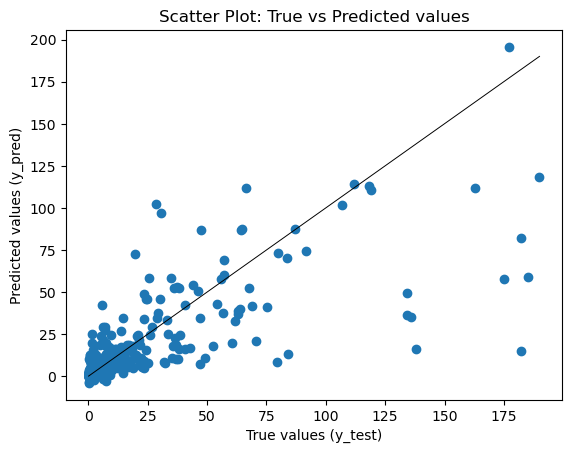

In [357]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()

In [358]:
filtered_df['Re']=filtered_df['U']*filtered_df['H']/nu
filtered_df.head()

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_4940\1050901444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Re']=filtered_df['U']*filtered_df['H']/nu


,N,River,ID,Date,W,S,Q,U,H,R,D16,D50,D84,D90,qs,Morphology,Re
0,61,Big wood,1.0,19/05/1999,12.76,0.0091,9.60,1.367911,0.55,0.50,0.028,0.116,0.25,0.38,0.768,Plane Bed,659957.102788
1,62,Big wood,2.0,19/05/1999,12.76,0.0091,9.60,1.367911,0.55,0.50,0.028,0.116,0.25,0.38,4.220,Plane Bed,659957.102788
2,63,Big wood,3.0,20/05/1999,12.76,0.0091,10.76,1.453897,0.58,0.54,0.028,0.116,0.25,0.38,2.310,Plane Bed,739701.919375
3,64,Big wood,4.0,20/05/1999,12.76,0.0091,10.87,1.443866,0.59,0.54,0.028,0.116,0.25,0.38,5.970,Plane Bed,747263.927845
4,65,Big wood,5.0,21/05/1999,12.77,0.0091,12.97,1.562556,0.65,0.59,0.028,0.116,0.25,0.38,9.910,Plane Bed,890931.322040
